Genre distribution before splitting:
Genre
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64
Cleaned data shape: (54214, 4)
Accuracy on Test Data: 0.45
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.36      0.48      2723
           1       0.26      0.36      0.30       318
           2       0.30      0.58      0.40       118
           3       0.80      0.55    

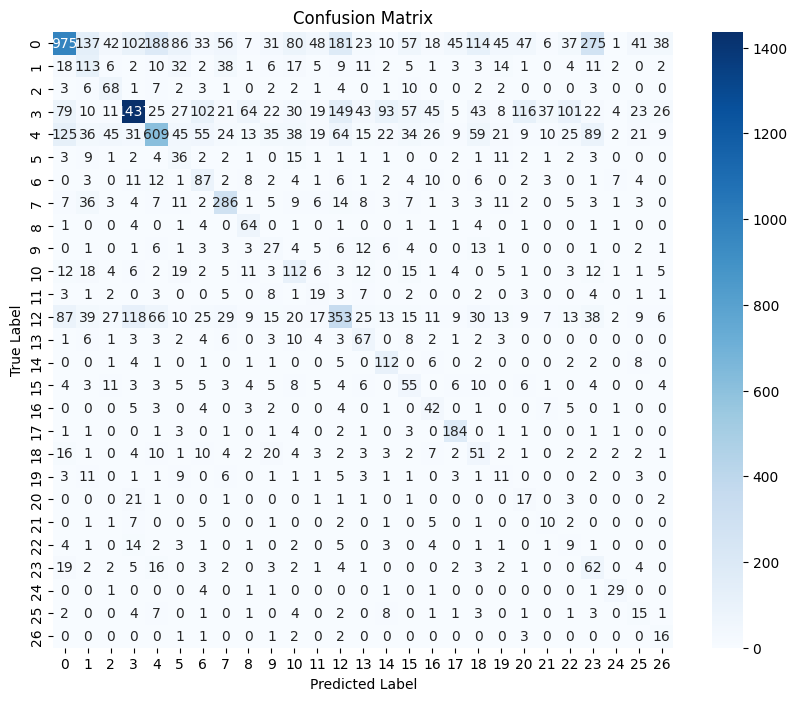

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the train and test data
train_data = pd.read_csv('train_data.txt', sep=':::', header=None, names=['ID', 'Title', 'Genre', 'Plot'], engine='python')
test_data = pd.read_csv('test_data.txt', sep=':::', header=None, names=['ID', 'Title', 'Plot'], engine='python')

# Step 2: Check genre distribution and clean data
print("Genre distribution before splitting:")
print(train_data['Genre'].value_counts())

# Check for missing values and clean
train_data = train_data.dropna(subset=['Genre', 'Plot'])
print("Cleaned data shape:", train_data.shape)

# Step 3: Encode the genre labels into numeric format
genre_to_id = {genre: idx for idx, genre in enumerate(train_data['Genre'].unique())}
id_to_genre = {v: k for k, v in genre_to_id.items()}
train_data['Genre'] = train_data['Genre'].map(genre_to_id)

# Step 4: Split the dataset
X = train_data['Plot']  # Text data (Plot descriptions)
y = train_data['Genre']  # Target labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Transform text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 6: Train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=200, class_weight='balanced')
logistic_model.fit(X_train_tfidf, y_train)

# Step 7: Evaluate the model
y_pred = logistic_model.predict(X_test_tfidf)
print(f"Accuracy on Test Data: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 8: Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=logistic_model.classes_, yticklabels=logistic_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()




In [ ]:

# Step 9: Save the trained model and TF-IDF vectorizer
with open('logistic_genre_classifier.pkl', 'wb') as model_file:
    pickle.dump(logistic_model, model_file)

with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf_vectorizer, vectorizer_file)

In [ ]:

# Step 10: Real-time genre prediction function
def predict_genre(plot_description):
    plot_tfidf = tfidf_vectorizer.transform([plot_description])  # Transform input using TF-IDF
    predicted_genre = logistic_model.predict(plot_tfidf)         # Predict genre
    predicted_genre_name = id_to_genre.get(predicted_genre[0], "Unknown Genre")  # Convert label to genre name
    print(f"Raw predicted genre (numeric): {predicted_genre[0]}")
    return predicted_genre_name

# Step 11: Interactive input loop for predictions
while True:
    user_input = input("Enter a plot description (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    predicted_genre = predict_genre(user_input)
    print(f"Predicted Genre: {predicted_genre}")


Enter a plot description (or type 'exit' to quit):  A love story between a rich girl and a poor boy on a ship.
Raw predicted genre (numeric): 23
Predicted Genre:  romance 
Enter a plot description (or type 'exit' to quit): exit
